In [1]:
''' Needed libraries '''
from lda_lib import lda_ajp # Our implementation of LDA
import numpy as np # For matrix operations
import matplotlib.pyplot as plt # For plotting
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # For comparison

In [2]:
''' Initialize dataset '''
dataset = np.load('datasets/fashion_train.npy') # Load dataset
print("Dataset shape: ", dataset.shape) # Print dataset shape (10000, 785)

Dataset shape:  (10000, 785)


In [3]:
''' Define X and y and check shapes'''
X = dataset[:, :-1] # Define X as all columns except the last one
y = dataset[:, -1] # Define y as the last column
print("X shape: ", X.shape) # Print X shape (10000, 784)
print("y shape: ", y.shape) # Print y shape (10000,)

X shape:  (10000, 784)
y shape:  (10000,)


In [4]:
''' Running LDAs'''

# Running our LDA
lda = lda_ajp(X, y) # Initialize our LDA
top_components = lda.main_lds(2) # Get first 2 LDA components
X_lda = lda.projection_matrix() # Project X onto the LDA space
print("X_lda shape: ", X_lda.shape) # Print X_lda shape (10000, 2)

# Running sklearn's LDA
sklearn_lda_eigen = LinearDiscriminantAnalysis(n_components=2, solver='eigen') # Initialize sklearn's LDA with 2 components and eigen solver
sklearn_lda_eigen.fit(X, y) # Fit sklearn's LDA with eigen solver
X_lda_sklearn = sklearn_lda_eigen.transform(X) # Project X onto the LDA space
print("X_lda_sklearn shape: ", X_lda_sklearn.shape) # Print X_lda_sklearn shape (10000, 2)

X_lda shape:  (10000, 2)
X_lda_sklearn shape:  (10000, 2)


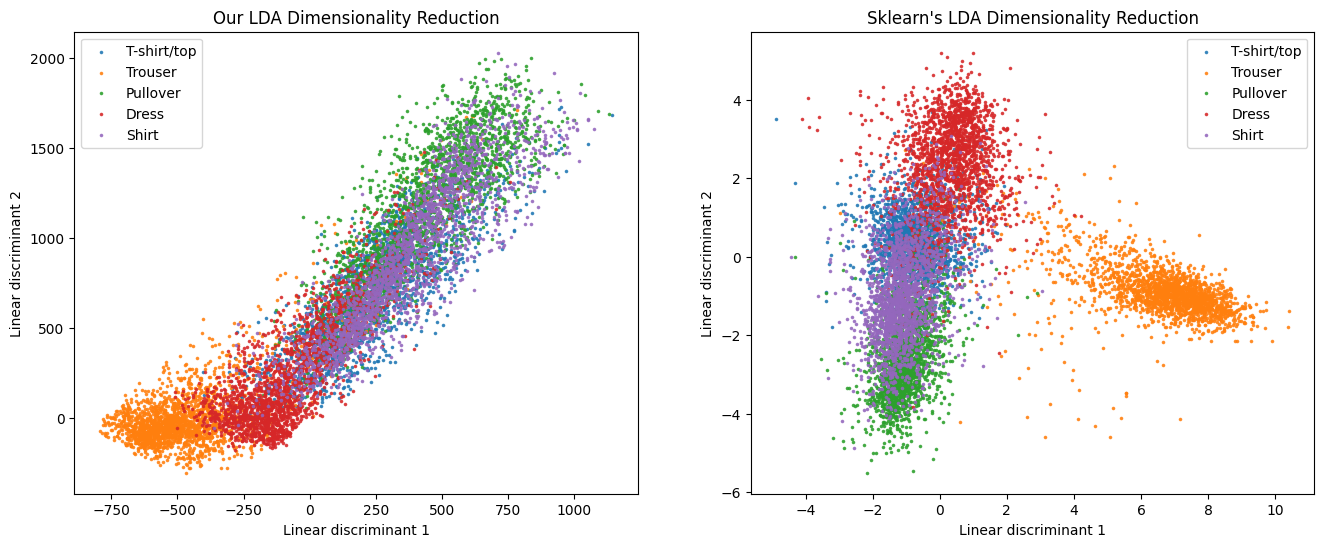

In [5]:
''' Plotting '''

# Labels dictionary
labels_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}

plt.figure(figsize=(16, 6))

# Plotting our LDA
plt.subplot(1, 2, 1)
for label_value, label_name in labels_dict.items():
    mask = (y == label_value)
    plt.scatter(X_lda[mask, 0], X_lda[mask, 1], label=label_name, s=10, alpha=0.8, marker='.', linewidths=1)

plt.title('Our LDA Dimensionality Reduction')
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend()

# Plotting sklearn's LDA
plt.subplot(1, 2, 2)
for label_value, label_name in labels_dict.items():
    mask = (y == label_value)
    plt.scatter(X_lda_sklearn[mask, 0], X_lda_sklearn[mask, 1], label=label_name, s=10, alpha=0.8, marker='.', linewidths=1)

plt.title("Sklearn's LDA Dimensionality Reduction")
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend()

plt.show()

### Below: comparison between SciKitLearn's LDA and our implementation of LDA

In [ ]:
''' Initialize our implementation of LDA '''
lda = lda_ajp(X, y)

In [ ]:
''' Initialize sklearn's implementations of LDA '''
sklearn_lda_eigen = LinearDiscriminantAnalysis(n_components=2, solver='eigen') # Initialize sklearn's LDA with 2 components and eigen solver (to compare matrices with our implementation)
sklearn_lda_svd = LinearDiscriminantAnalysis(n_components=2, solver='svd') # Initialize sklearn's LDA with 2 components and svd/default solver (to compare central point with our implementation)

sklearn_lda_eigen.fit(X, y) # Fit sklearn's LDA with eigen solver
sklearn_lda_svd.fit(X, y) # Fit sklearn's LDA with svd solver

sklearn_lda_projection_eigen = sklearn_lda_eigen.transform(X) # Project X onto the LDA space
sklearn_lda_projection_svd = sklearn_lda_svd.transform(X) # Project X onto the LDA space

In [ ]:
''' Class means (just for comparison, can be skipped) '''

class_means = lda.class_means # Get class means from our implementation of LDA
sklearn_class_means = sklearn_lda_eigen.means_ # Get class means from sklearn's LDA with eigen solver


''' Comparison '''
print("Class means from our implementation:")
print(class_means)

print("\nClass means from Sklearn's LDA:")
print(sklearn_class_means)

print("\nDifference between class means from our implementation and Sklearn's LDA:")
print(class_means - sklearn_class_means)

In [ ]:
''' Central point (mean of the class means) (just for comparison, can be skipped) '''

our_cp = lda.central_point
sklearn_cp = sklearn_lda_svd.xbar_

print("Central point from our implementation:")
print(our_cp[0:5]) # Print first 5 elements of central point
print(our_cp.shape) # Print central point shape

print("\nCentral point from Sklearn's LDA:")
print(sklearn_cp[0:5]) # Print first 5 elements of central point
print(sklearn_cp.shape) # Print central point shape

print("\nRounded central point from sklearn's LDA:")
print(np.round(sklearn_cp[0:5], 4)) # Print first 5 elements of central point rounded to 4 decimal places

In [ ]:
''' Within scatter matrix (just for comparison, can be skipped) '''

our_within = lda.scatter_within()
sklearn_within = sklearn_lda_eigen.covariance_

print("Our within scatter matrix:")
print(our_within) # Print our within scatter matrix
print("\nSklearn's within scatter matrix:")
print(sklearn_within) # Print sklearn's within scatter matrix (covariance matrix) - needs eigen solver

In [ ]:
''' Within scatter matrix (continuation of above cell) '''

print("Size of our within scatter matrix:", our_within.shape)
print("Size of Sklearn's within scatter matrix:", sklearn_within.shape)
print("Mean of Our Within:", np.mean(our_within))
print("Mean of Sklearn's Within:", np.mean(sklearn_within))
print("Standard Deviation of Our Within:", np.std(our_within))
print("Standard Deviation of Sklearn's Within:", np.std(sklearn_within))
print("Maximum value in Our Within:", np.max(our_within))
print("Maximum value in Sklearn's Within:", np.max(sklearn_within))
print("Minimum value in Our Within:", np.min(our_within))
print("Minimum value in Sklearn's Within:", np.min(sklearn_within))

absolute_diff = np.abs(our_within - sklearn_within)
print("Maximum absolute difference between matrices:", np.max(absolute_diff))
print("Minimum absolute difference between matrices:", np.min(absolute_diff))

In [ ]:
''' Between scatter matrix (just for comparison, can be skipped) '''
sklearn_scatter_between = sklearn_lda_eigen.scalings_ # Get between scatter matrix from sklearn's LDA with eigen solver
our_scatter_between = lda.scatter_between() # Get between scatter matrix from our implementation of LDA

print("Our between scatter matrix:")
print(our_scatter_between) # Print our between scatter matrix
print("\nSklearn's between scatter matrix:")
print(sklearn_scatter_between) # Print sklearn's between scatter matrix

In [ ]:
''' Between scatter matrix (continuation of above cell) '''	

print("Size of Our Between:", our_scatter_between.shape)
print("Size of Sklearn's Between:", sklearn_scatter_between.shape)
print("Mean of Our Between:", np.mean(our_scatter_between))
print("Mean of Sklearn's Between:", np.mean(sklearn_scatter_between))
print("Standard Deviation of Our Between:", np.std(our_scatter_between))
print("Standard Deviation of Sklearn's Between:", np.std(sklearn_scatter_between))
print("Maximum value in Our Between:", np.max(our_scatter_between))
print("Maximum value in Sklearn's Between:", np.max(sklearn_scatter_between))
print("Minimum value in Our Between:", np.min(our_scatter_between))
print("Minimum value in Sklearn's Between:", np.min(sklearn_scatter_between))

absolute_diff = np.abs(our_scatter_between - sklearn_scatter_between)
print("Maximum absolute difference between matrices:", np.max(absolute_diff))
print("Minimum absolute difference between matrices:", np.min(absolute_diff))

In [ ]:
''' Main components from LDA (just for comparison, can be skipped) '''

print("First 2 LDA components from our implementation:")
print(lda.main_lds(2))
print("\nFirst 2 LDA components from Sklearn's LDA:")
print(sklearn_lda_eigen.scalings_[:, 0:2])
print("Size of our main components:", lda.main_lds(2).shape)
print("Size of Sklearn's main components:", sklearn_lda_eigen.scalings_[:, 0:2].shape)